# Car Price Prediction using Linear Regression

### Importing libraries and reading data

In [1]:
import pandas as pd

In [2]:
cp=pd.read_csv(r"C:\Users\nisha\OneDrive\Documents\Datasets\car_price.csv")

In [3]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [6]:
def custom_converter(value):
    try:
        return float(value)
    except ValueError:
        return None 
l1=['normalized_losses','bore','stroke','horsepower','peak_rpm','price']
for i in l1:
    cp[i] = cp[i].apply(custom_converter)

### Checking for nulls and filling them

In [7]:
cp.isnull().sum()[cp.isnull().sum()>0]

normalized_losses    41
bore                  4
stroke                4
horsepower            2
peak_rpm              2
price                 4
dtype: int64

In [8]:
cp.normalized_losses=cp.normalized_losses.fillna(cp.normalized_losses.mean())
cp.bore=cp.bore.fillna(cp.bore.mean())
cp.stroke=cp.stroke.fillna(cp.stroke.mean())
cp.horsepower=cp.horsepower.fillna(68.0)
cp.peak_rpm=cp.peak_rpm.fillna(5500.0)
cp.price=cp.price.fillna(13499.0)

In [9]:
cp.isnull().sum()[cp.isnull().sum()>0]

Series([], dtype: int64)

In [10]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    float64
 2   Fuel_type          205 non-null    object 
 3   make               205 non-null    object 
 4   num_of_doors       205 non-null    object 
 5   aspiration         205 non-null    object 
 6   wheel_base         205 non-null    object 
 7   engine_location    205 non-null    object 
 8   drive_wheels       205 non-null    float64
 9   body_style         205 non-null    object 
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

### Applying label encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
cp[cp.select_dtypes(include='object').columns]=cp[cp.select_dtypes(include='object').columns].apply(le.fit_transform)

In [13]:
cp.head()

,symboling,normalized_losses,Fuel_type,make,num_of_doors,aspiration,wheel_base,engine_location,drive_wheels,body_style,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,1,0,2,0,2,0,88.6,0,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,1,0,2,2,2,0,94.5,0,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,0,1,3,1,0,99.8,1,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,0,1,3,0,0,99.4,1,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Splitting data into train and test

In [14]:
from sklearn.model_selection import train_test_split

cp_train,cp_test=train_test_split(cp,test_size=.2)

In [15]:
cp_train_x=cp_train.iloc[::,0:25]
cp_train_y=cp_train.price

cp_test_x=cp_test.iloc[::,0:25]
cp_test_y=cp_test.price

### Building a lnear regression model on data

In [16]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [17]:
linreg.fit(cp_train_x,cp_train_y)

LinearRegression()

In [18]:
linreg.score(cp_train_x,cp_train_y) #adjusted R square

0.8681117649374693

In [19]:
Rsquare=linreg.score(cp_train_x,cp_train_y)
N=cp_train_x.shape[0]
K=cp_train_x.shape[1]
Adju_Rsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adju_Rsquare

0.8442189687304891

In [20]:
linreg.intercept_

-45433.054178359445

In [21]:
linreg.coef_  

array([ 9.76967082e+00, -1.09777017e+01,  5.03949107e+02,  2.22473213e+03,
       -6.90629000e+02, -1.03369389e+03,  7.59650180e+02,  1.13783441e+04,
        9.13181335e+01, -2.21485876e+02,  9.16161824e+01,  5.17395940e+01,
        2.53817148e+02,  2.06122025e+00,  2.50215562e+02,  1.27327164e+03,
        1.36638563e+02,  2.03100460e+02, -1.87852481e+03, -3.28983257e+03,
        9.57751599e+01, -2.10725045e+01,  2.36966193e+00,  9.09576748e+01,
       -1.63534841e+01])

In [22]:
pred_train=linreg.predict(cp_train_x)

In [23]:
pred_test=linreg.predict(cp_test_x)

In [24]:
err_train=cp_train_y-pred_train

In [25]:
err_train

154    2216.348561
165    1012.763479
45     5923.650531
17     5632.457816
155    1515.924973
          ...     
46    -2530.418755
3      1033.736466
108   -5895.873084
103   -9427.880689
183     240.957146
Name: price, Length: 164, dtype: float64

In [26]:
err_train.mean()

-9.139312612937718e-12

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

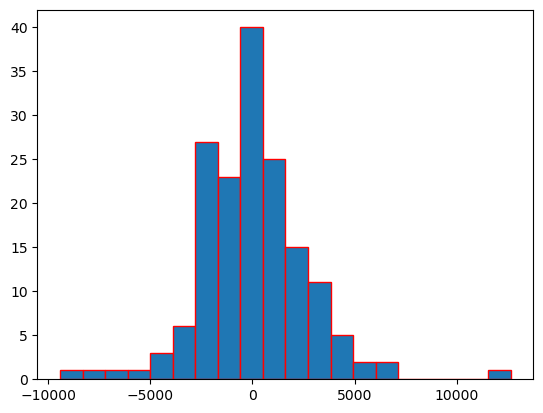

In [28]:
plt.hist(err_train,edgecolor='red',bins=20);

In [29]:
err_train.skew()

0.3665277970299658

In [30]:
err_train.kurtosis()+3

6.672952470646246

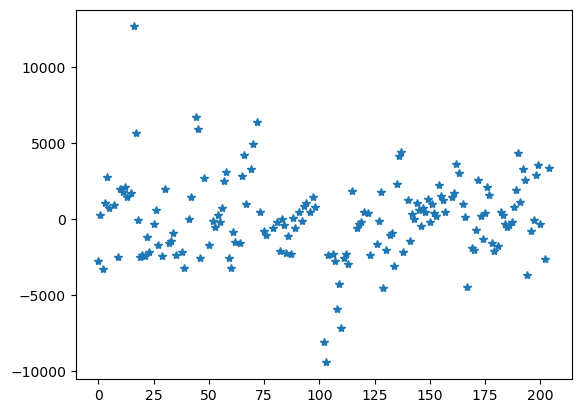

In [31]:
plt.plot(err_train,'*');

In [32]:
pred_actual=pd.DataFrame()
pred_actual['Actual']=cp_train_y
pred_actual['Pred']=pred_train

In [33]:
pred_actual

,Actual,Pred
154,7898.0,5681.651439
165,9298.0,8285.236521
45,13499.0,7575.349469
17,36880.0,31247.542184
155,8778.0,7262.075027
...,...,...
46,11048.0,13578.418755
3,13950.0,12916.263534
108,13200.0,19095.873084
103,13499.0,22926.880689


<Axes: xlabel='Actual', ylabel='Pred'>

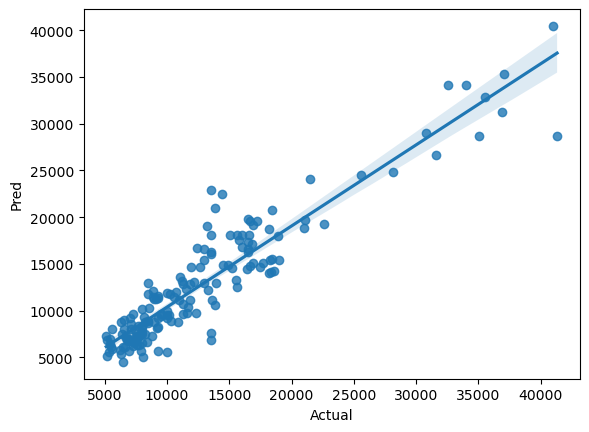

In [34]:
sns.regplot(x='Actual',y='Pred',data=pred_actual)

In [35]:
err_test=cp_test_y-pred_test

In [36]:
import numpy as np

In [37]:
mse=np.mean(np.square(err_test))
mse

11650759.81929092

In [38]:
rmse=np.sqrt(mse)
rmse

3413.3209370481

In [39]:
MAPE=np.mean(np.abs(err_test*100/cp_test_y))
MAPE

18.8706961443979

In [40]:
Acc=100-MAPE
Acc

81.1293038556021

### Conclusion:
Model Performance Metrics:

MSE: 11,650,759.82
RMSE: 3,413.32
MAPE: 18.87%
Accuracy: 81.13%

The model explains 81.13% of the variance in car prices, indicating decent predictive power.